# Gevorderde grafieken

## Inleiding tot MatplotLib

Tot nu toe hebben we ons in Sympy altijd vlot kunnen redden met de ingebouwde `plot`-functie. Als we meer willen doen met grafieken hebben we een krachtigere gereedschapskist nodig. Deze wordt aangeleverd door MatplotLib. MatplotLib heeft mogelijkheden om grafieken in 2D en 3D te tekenen. De belangrijkste commando's doen we hier uit de doeken. In een eerste kennismaking kan MatplotLib een beetje intimiderend overkomen. Dit is omdat het pakket alle controle in jouw handen plaatst. Het voordeel hiervan is dat de computer exact doet wat je zegt. Het nadeel hiervan is dat je exact tegen de computer moet kunnen zeggen wat je wilt. Na een beetje oefening zal de werkwijze echter een zekere routine worden.

MatplotLib heeft een syntax die zeer sterk gebaseerd is op de stijl in het vaakgebruikte MATLAB software pakket en genereert grafieken van publicatiekwaliteit. Dit neemt niet weg dat, voor specifieke toepassingen, andere pakketten beter geschikt zijn: het traag tekenen dat eigen is aan MatplotLib zorgt ervoor dat als je in realtime veranderende grafieken wilt voorstellen, MatplotLib een slechte keuze is.

Een uitstekende handleiding voor matplotlib (in het bijzonder de pyplot bibliotheek die wij zullen gebruiken) kun je vinden op http://matplotlib.org/users/pyplot_tutorial.html. In deze worksheet overlopen we de voornaamste manieren om grafieken te maken.

Je start MatplotLib in een notebook omgeving door volgende commando's. MatplotLib is ook hecht geintegreerd met Numpy, vandaar dat we dit ook importeren. Numpy zal ervoor zorgen dat we snel en efficiënt numerieke berekeningen kunnen maken en MatplotLib zal de uitkomsten van deze berekeningen gebruiken om grafieken te tekenen.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display

Vervolgens kan je een eenvoudige figuur met assenstelsel maken op de volgende manier:

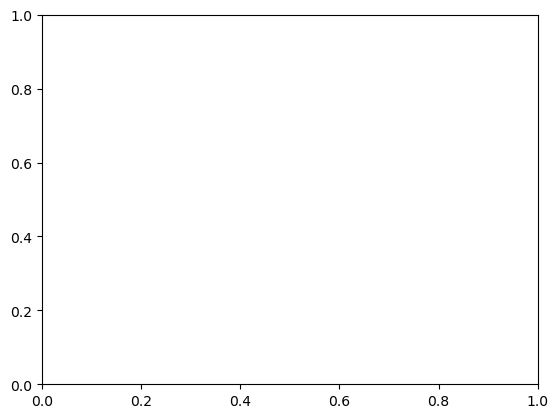

In [2]:
fig, ax = plt.subplots(1, 1)
plt.show()

Nu is *fig* een Figure object en *ax* een Axis object.

Als je meerdere assen wilt hebben om meerdere grafieken naast elkaar weer te geven, dan kan je dit doen door het commando op de volgende manier aan te passen:

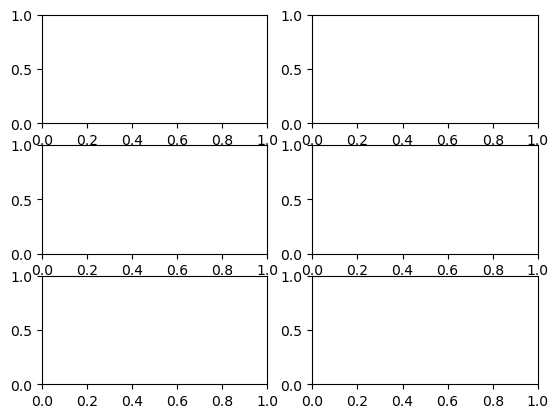

In [5]:
fig, ax = plt.subplots(3, 2)
plt.show()

Nu er meerdere assen in de figuur zijn is *ax* niet meer een Axis object, maar een lijst van lijsten met Axis objecten in. Als je de as op rij 3 kolom 2 wilt gebruiken selecteer je

In [6]:
ax[2][1]  # ! Denk eraan: in Python heeft het eerste element in een lijst index 0

<Axes: >

Het object `fig` laat je dus toe om de globale opties te beheren van de figuur, terwijl `ax` je toelaat om iedere subplot aan te passen aan je wensen. Het commando `plt.show()` zorgt ervoor dat de figuur getekend wordt op je scherm. In notebooks is dit niet strikt noodzakelijk omdat dan zo goed als altijd de figuur vanzelf getekend wordt. Toch is het goed om de gewoonte aan te kweken dit onder iedere plot te zetten. Als je zelf een script schrijft dat plots maakt, zal je zeker altijd dit commando moeten gebruiken.

### Lijnplots

Zoals zovele numerische bibliotheken gaat MatplotLib exact tekenen wat je zelf ingeeft. Dit gebeurt standaard door 2 lijsten van getallen in te geven: een lijst met x-coordinaten en een met y-coordinaten. Je kan dan kiezen om deze punten op verschillende manieren te laten tekenen: verbinden met een lijn, met enkel een markering, of allebei.

We nemen het (klassieke) voorbeeld van een sinus:

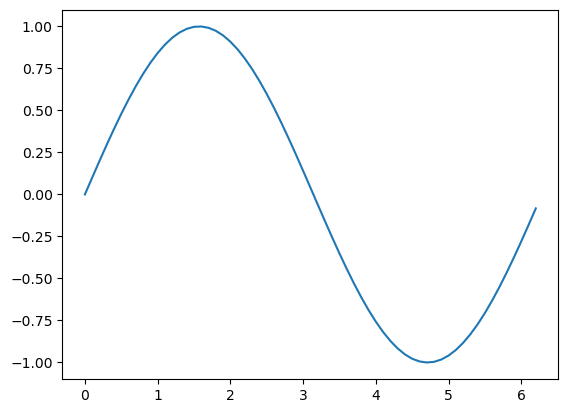

In [7]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y) # Dit verbindt alle gegeven punten met een lijn
plt.show()

Wat doet deze code precies? We gebruiken Numpy om een lijst x-waarden te genereren. Het commando `arange` deelt het interval $[0, 2\pi]$ hier op in deelintervallen van lengte $0.1$. Merk ook op dat we hier de Numpy-versie van `pi` gebruiken en niet de Sympy-versie. Vervolgens berekenen we van iedere x-waarde de sinus. Numpy heeft een hele reeks ingebouwde wiskundige functies die standaard inwerken op een lijst. De Numpy-versie van de sinus neemt dus bij een lijst van iedere waarde de sinus.

Wanneer we de numerieke data hebben, kunnen we het plotvenster klaarmaken. Omdat we maar één tekening nodig hebben, moeten we dus de code voor maar één venster gebruiken. Omdat `ax` alles beheert wat er in het venster gebeurt, roepen we `plot` aan op het object `ax`.

**Opdracht 1:** Gebruik Matplotlib om de grafiek van $f(x) = \frac{e^x}{x^2}$ te plotten op het interval [1,3]. Zorg ervoor dat je `np.exp()` gebruikt in plaats van `sp.exp()`!

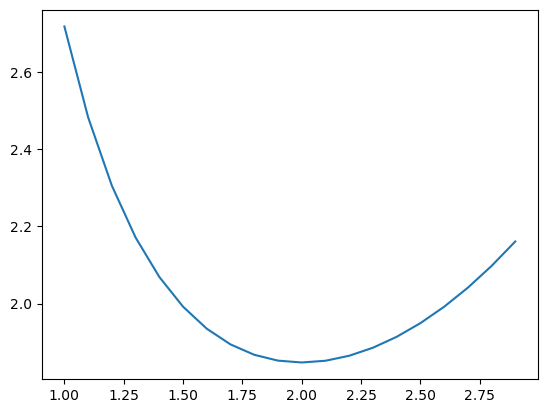

In [33]:
fig, ax = plt.subplots(1,1)

x = np.arange(1, 3, 0.1)
y = np.exp(x)/x**2

ax.plot(x, y)
plt.show()

Indien we meerdere grafieken in een venster willen tonen, kunnen we dit doen door verschillende `ax.plot(x, f(x))` commando's in te geven tussen het commando `fig,ax = plt.subplots(1,1)` dat het plotvenster klaar zet en het commando `plt.show()` dat ervoor zorgt dat het plotvenster getoond wordt aan de gebruiker.

**Opdracht 2:** Pas je code van opdracht 1 aan zodat niet enkel de grafiek van $f_1(x) = \frac{e^x}{x^2}$ getoond wordt, maar ook de grafiek van $f_2(x) = \frac{e^{x}}{x^3}$ (in hetzelfde venster).

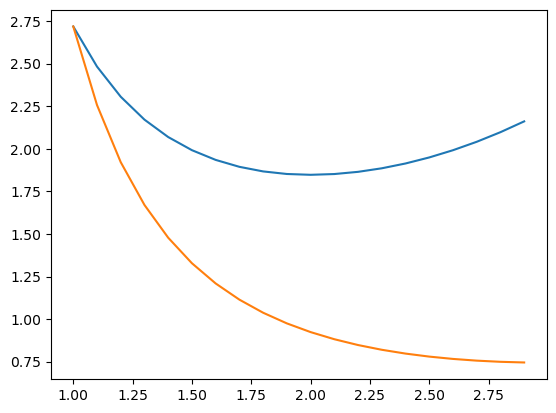

In [34]:
fig, ax = plt.subplots(1,1)

x = np.arange(1, 3, 0.1)
y1 = np.exp(x)/x**2
y2 = np.exp(x)/x**3

ax.plot(x, y1)
ax.plot(x, y2)
plt.show()

Vervolgens willen we de grafiek van een sinusfunctie $\sin(501.5 x)$ tekenen:

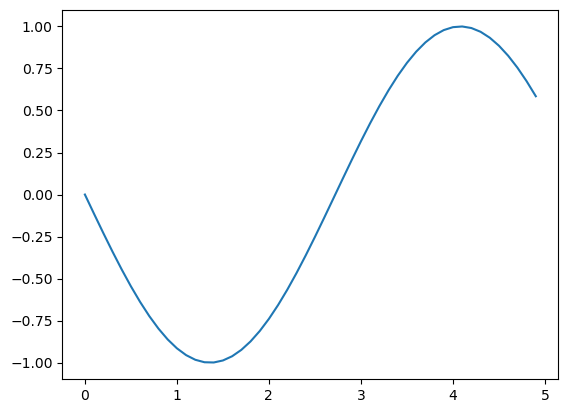

In [37]:
fig, ax = plt.subplots(1,1)
x = np.arange(0, 5, 0.1)
ax.plot(x, np.sin(501.5*x))
plt.show()

**Opdracht 3:** Je zou verwachten dat $\sin(501.5x)$ veel sneller zou oscilleren dan dat je ziet op de grafiek. Wat is er foutgelopen hierboven? *Hint:* probeer de opdeling van de x-waarden wat fijner te maken.

Je ziet hier al onmiddellijk een probleem bij het gebruik van plottingsoftware: je moet een voldoende aantal punten in het correcte gebied hebben om de functie juist weer te geven! Laten we nu deze sinus tekenen over één periode.

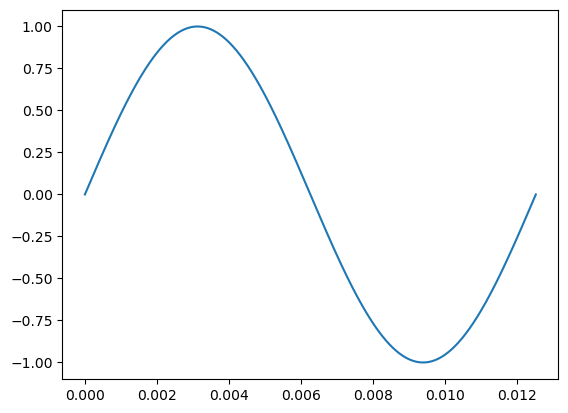

In [38]:
x = np.linspace(0, 2*np.pi/501.5, 1000)
y = np.sin(501.5*x)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
plt.show()

Hier zie je het gebruik van `linspace`. Dit commando deelt het interval van $0$ tot $2\pi/501.5$ op in 100 stukjes. Bij `arange` kan je dus een stapgrootte ingeven, bij `linspace` het aantal punten. Ieder commando heeft zo zijn nut.

Je kan voor de grafieken verschillende lijnstijlen en kleuren gebruiken. Je specifieert dit door na je datapunten een string mee te geven die de stijl encodeert. Ook kan je de lijnbreedte aanpassen:

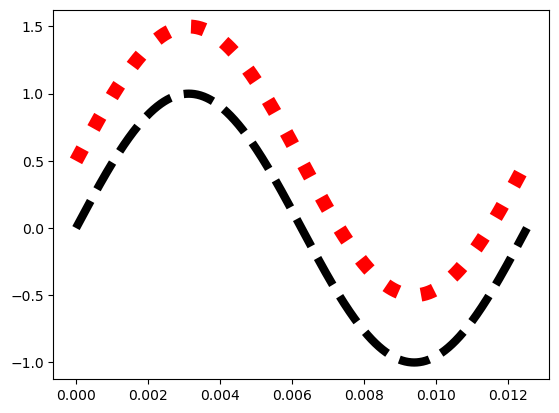

In [39]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, '--k', linewidth=6)
ax.plot(x, y+0.5, ':r', linewidth=10)
plt.show()

Voor een lijst van lijnstijlen en kleuren, kijk <a href="http://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html">hier</a> en <a href="http://matplotlib.org/api/colors_api.html">hier</a>.

**Opdracht 4:** Maak zelf een plotvenster aan dat bestaat uit twee assenobjecten boven elkaar. Op de bovenste teken je de sinus en op de onderste teken je de cosinus. Beide x-assen lopen van $0$ tot $2\pi$. Opgelet: hierboven kon je de verschillende assenobjecten bereiken door bijv. `ax[2][1]`. Als alle assenobjecten op één lijn staan, is er maar één index nodig: `ax[0].plot` zal een grafiek genereren in het eerste plotvenster, `ax[1].plot` zal een grafiek genereren in het tweede plotvenster.

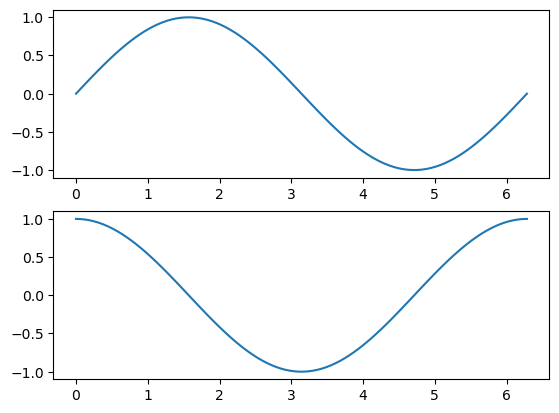

In [43]:
fig, ax = plt.subplots(2, 1)
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

ax[0].plot(x, y1)
ax[1].plot(x, y2)
plt.show()

### Dataplots

Als je enkel je datapunten wilt weergeven zonder verbindingslijn, dan kan dit door een markeerstijl mee te geven:

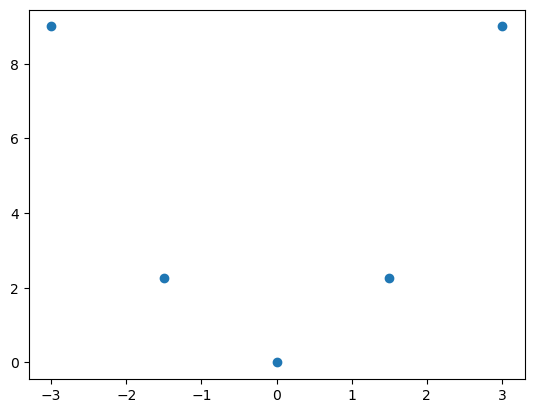

In [44]:
x = np.linspace(-3, 3, 5)
y = x**2

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'o', markersize=6) #Gebruik een bolletje om het datapunt te tekenen, met een grootte van 6
plt.show()

Je kan ook een lijnstijl meegeven, en dan worden de datapunten met deze lijn verbonden.

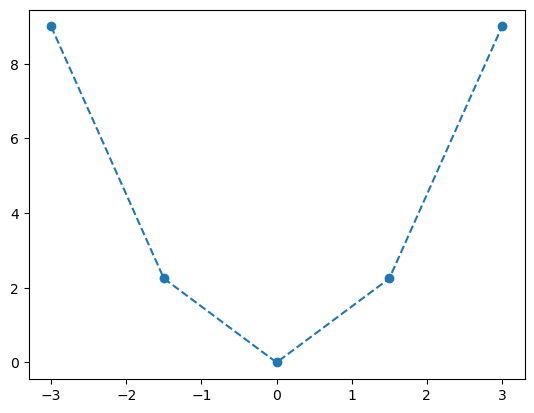

In [45]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, '--o', markersize=6) #Gebruik een bolletje om het datapunt te tekenen, met een grootte van 6
plt.show()

Je kan ook een regio tussen twee curves inkleuren:

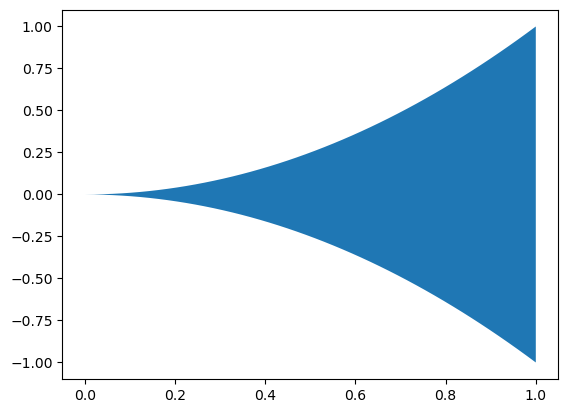

In [46]:
x = np.linspace(0, 1)
y_1 = -x**2
y_2 = x**2

fig, ax = plt.subplots(1, 1)
ax.fill_between(x, y_1, y_2)
plt.show()

Soms is het handig om bepaalde elementen transparant te maken. Alle plot commando's hebben een keyword *alpha* dat bepaalt hoe transparant de getekende elementen zijn.

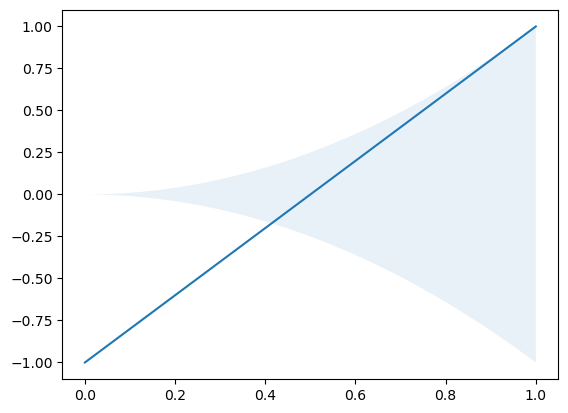

In [47]:
fig, ax = plt.subplots(1, 1)
ax.fill_between(x, y_1, y_2, alpha=0.1)
ax.plot(x, 2*x-1)
plt.show()

### Detaillering

Bij het maken van een mooie grafiek ga je ook de assen moeten voorzien van een label en eventueel een legende voorzien. De commando's om dit te realiseren zijn als volgt:

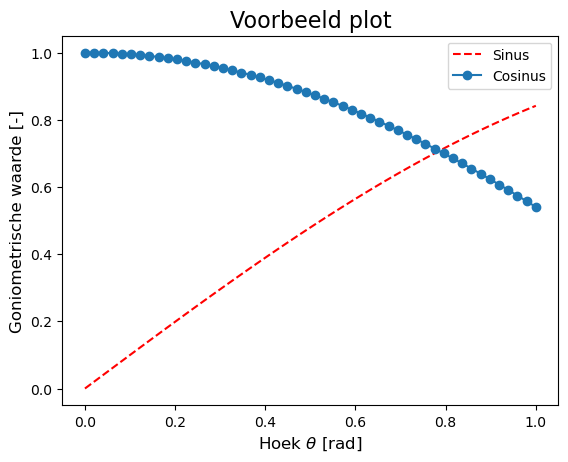

In [48]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, np.sin(x), '--r', label='Sinus')
ax.plot(x, np.cos(x), '-o', label='Cosinus')
ax.set_xlabel(r'Hoek $\theta$ [rad]', fontsize=12) # de r voor de definitie van de string zorgt ervoor dat de backslash correct gelezen wordt.
ax.set_ylabel('Goniometrische waarde [-]', fontsize=12)
ax.set_title('Voorbeeld plot', fontsize=16)
ax.legend(loc='best', fontsize=10)
plt.show()

Zoals je kan merken is het mogelijk om de fontgrootte van de labels in te voeren. Het is ook mogelijk om het gebruikte font te veranderen. Het argument `loc` bepaald de positie van de legende, door dit op `'best'` te zetten bepaalt matplotlib zelf de beste plaats. 

**Opdracht 5:** Maak een grafiek die de oppervlakte tussen de krommen met vergelijking $y_1 = x$ en $y_2 = \sqrt{x}$ visualiseert. Laat enkel de eindige oppervlakte inkleuren, die zich tussen de twee snijpunten bevindt. Gebruik eventueel het `solve` commando om deze snijpunten automatisch te berekenen.

Zorg ervoor dat je grafiek een label heeft voor beide assen en een toepasselijke titel.

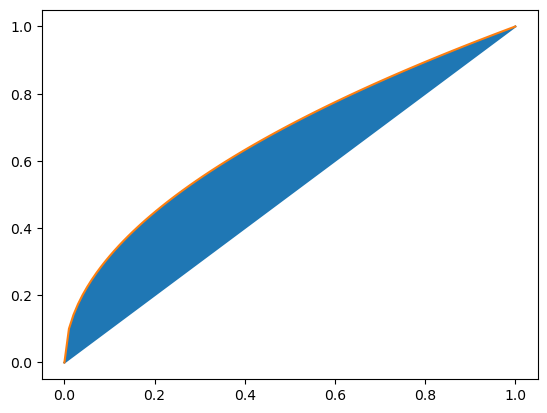

In [97]:
fig, ax = plt.subplots(1, 1)

x = sp.symbols('x')
f1 = sp.Function('f1')
f1 = x

f2 = sp.Function('f2')
f2 = sp.sqrt(x)

a = sp.solveset(sp.Eq(f1, f2), x)
eerste = int(a.args[0])
tweede = int(a.args[1])

x = np.linspace(eerste, tweede, 100)
type(a.args[0])
f1 = x
f2 = np.sqrt(x)
tussen = np.linspace(eerste, tweede, 100)
# tussen = np.linspace(0, a.args[1], 100)
ax.plot(x, f1)
ax.plot(x, f2)
ax.fill_between(x, f1, f2)
plt.show()

### Statistische plots

Matplotlib kan ook statistische plots maken, zoals boxplots en histogrammen.

Een voorbeeld van een histogram van normaal verdeelde data, samen met een boxplot, is:

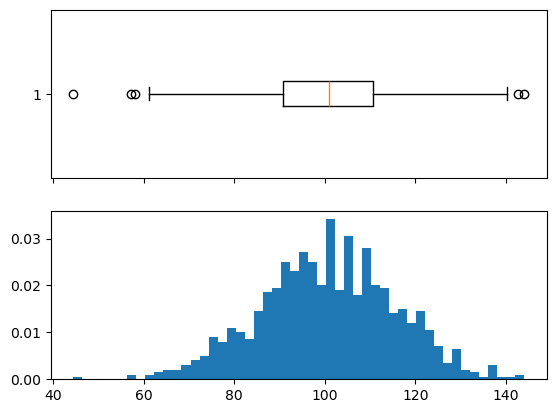

In [98]:
data = np.random.randn(1000) * 15 + 100 #1000 datapunten, mu=100, sigma=15

fig, ax = plt.subplots(2, 1, sharex=True)
ax[1].hist(data, bins=50, density=True)
ax[0].boxplot(data, vert=False)
plt.show()

Met iets meer aandacht kan deze plot beter leesbaar gemaakt worden.

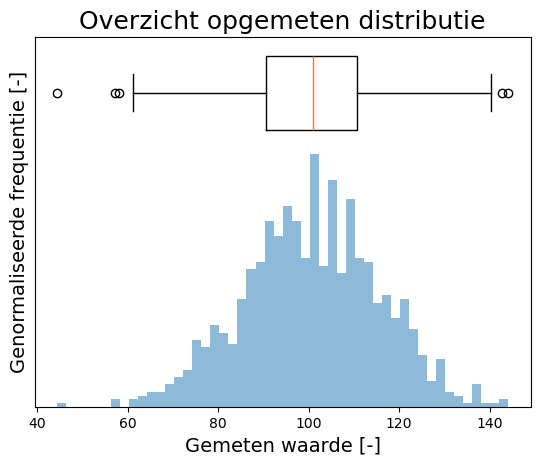

In [99]:
fig, ax = plt.subplots(1, 1)
ax.hist(data, bins=50, density=True, histtype='stepfilled', alpha=0.5)
ax.boxplot(data, vert=False, positions=[0.0425], widths=0.01)
ax.set_ylabel('Genormaliseerde frequentie [-]', fontsize=14)
ax.set_xlabel('Gemeten waarde [-]', fontsize=14)
ax.set_title('Overzicht opgemeten distributie', fontsize=18)
ax.set_yticks([])
ax.set_ylim([0, 0.05])
plt.show()

### Parameterkrommen

Je kan ook, in plaats van een functie te tekenen, een parameterkromme laten tekenen. Je doet dit door, in functie van je parameter, apart de x en y coordinaat te berekenen. Hieronder is de parameterkromme
$$
\left\{
\begin{align*}
x(t) &= \sin(3t)\\
y(t) &= \sin(2t)
\end{align*}
\right.
$$
getekend. We maken eerst een lijst met $t$-waarden, zetten deze vervolgens om in $x$- en $y$-waarden en tenslotte tekenen we enkel de $x$- en $y$-waarden.

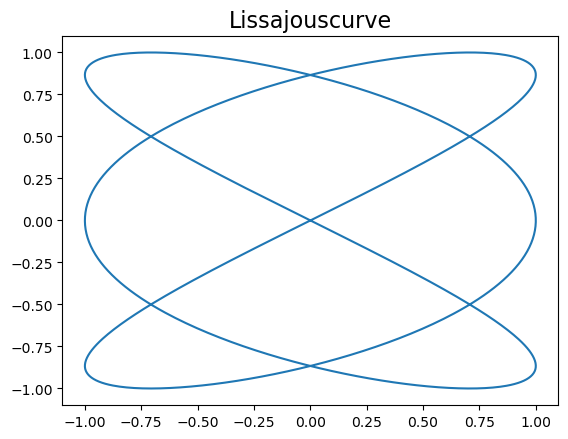

In [100]:
t = np.linspace(0, 2*np.pi, 1000)

x = np.sin(3*t)
y = np.sin(2*t)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
ax.set_title('Lissajouscurve', fontsize=16)
plt.show()

Je hebt ook de mogelijkheid om een poolkromme te tekenen. Om dit gedaan te krijgen zal je, zoals hieronder gedaan, de subplot op 111 moeten zetten en het extra argument `projection='polar'` moeten meegeven. Eens je dit gedaan hebt, kan je $(\theta, r(\theta))$-koppels (in die volgorde!) meegeven aan de functie `plot`. Hieronder is de poolkromme
$$r = \lvert\cos(4\theta)\rvert$$
getekend.

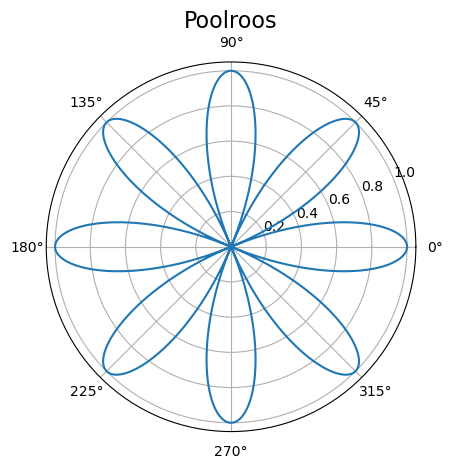

In [103]:
theta = np.linspace(0, 2*np.pi, 100000)
r = np.abs(np.cos(4*theta))

fig = plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_title('Poolroos', fontsize=16)
plt.show()

## Op naar 3D
### Oppervlakken

Grafieken in 3D vergen iets meer werk dan grafieken in 2D. Om te beginnen moet je nu $x$-, $y$- en $z$-waarden meegeven. Ten tweede moet je tegen MatplotLib zeggen dat er nu 3D-tekeningen gemaakt moeten worden. Om de 3D-mogelijkheden in te schakelen, moet je eerst volgend commando uitvoeren.

In [104]:
import mpl_toolkits.mplot3d.axes3d as axes3d

Beschouw om te beginnen volgende functie van 2 variabelen:

$$f(x,y) = xy-14.$$

We zullen deze functie tekenen voor $x$ in $[-5, 5]$ en $y$ in $[-5, 5]$. Eerst maken we (zoals hierboven) lijsten aan met $x$- en $y$-waarden.

In [105]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

we hebben nu twee lijsten van getalwaarden. Als we nu het commando

`z = x*y - 14`

zouden uitvoeren, zouden we een foutief resultaat krijgen. De $z$-waarden zouden dan gewoon in één lijst gestoken worden. Meer nog, we zouden niet aan iedere combinatie van $(x,y)$-waarden een $z$-waarde kunnen koppelen. Om in 3D te kunnen tekenen, moeten we vertrekken van de lijsten met $x$- en $y$-waarden en hier een *mesh grid* van maken, een rooster van $x$- en $y$-waarden.

In [106]:
X, Y = np.meshgrid(x, y)

Nu kunnen we van ieder punt van dit rooster de $z$-waarde berekenen.

In [107]:
Z = X*Y - 14

We hebben nu alle data om onze plot te maken. Hier stopt ons werk met Numpy en gaan we over naar MatplotLib. De code voor een 3D-venster is als volgt. Een grafiek van een functie van twee variabelen teken je met `plot_surface`.

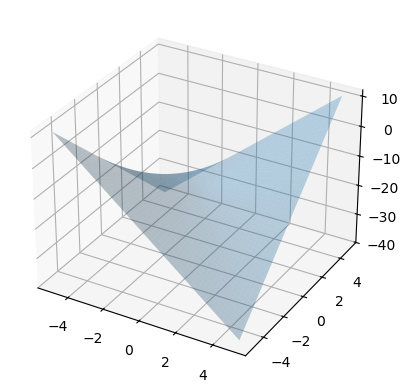

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Teken de grafiek van f door de objecten X, Y en Z mee te geven aan plot_surface
ax.plot_surface(X, Y, Z, alpha=0.3) # alpha=0.3 zorgt voor enige transparantie
plt.show()

Als je een 3D-plot maakt, kan je deze eerst ronddraaien alvorens een uitzicht vast te leggen.

### Parameterkrommen

Voor een *kromme* in 3D heb je geen rooster nodig, gewoon lijsten met $x$-, $y$- en $z$-waarden volstaan. In plaats van `plot_surface` kan je dan ook gewoon `plot` gebruiken. We tekenen hier de parameterkromme
$$(x(t), y(t), z(t)) = (\sin(t), \sin(t)\cos(t), \sin(t))$$
waarbij $t$ loopt van $-\pi$ tot $\pi$.

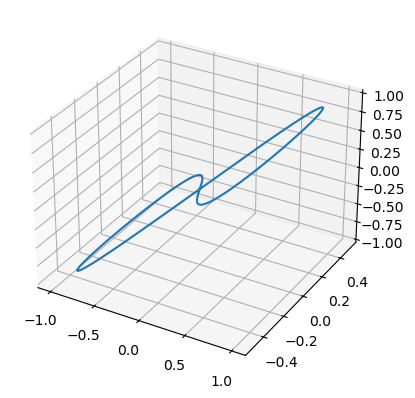

In [110]:
t = np.linspace(-np.pi, np.pi, 200)
x = np.sin(t)
y = np.sin(t)*np.cos(t)
z = np.sin(t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

**Opdracht 6:** Teken nu zelf de parameterkromme
$$(x(t), y(t), z(t)) = (\cos(t), \sin(t), 2t)$$
waarbij $t$ loopt van $0$ tot $4\pi$.

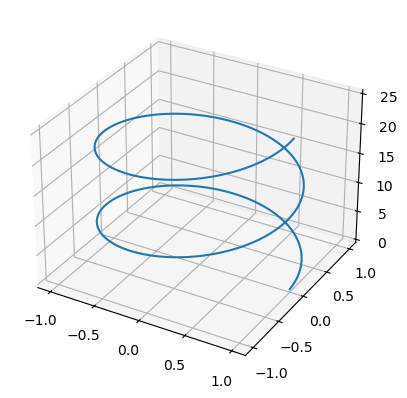

In [113]:
t = np.linspace(0, np.pi*4, 200)
x = np.cos(t)
y = np.sin(t)
z = 2*t

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

### Parameteroppervlakken

Je hebt net gezien hoe, door een parameter $t$ te gebruiken, je eenvoudig een kromme kan tekenen die $t$ als parameter bevat. Nu gaan we (bij wijze van voorsmaakje) een stap verder. Als één parameter je toelaat een kromme te tekenen, dan zullen twee parameters je toelaten een oppervlak te tekenen. We laten de werkwijze zien door hier het oppervlak
$$\mathbf{r}(u, v) = (u, 2v^2, u^2+v)$$
te tekenen waarbij $u\in[-4, 4]$ en $v\in[-4, 4]$

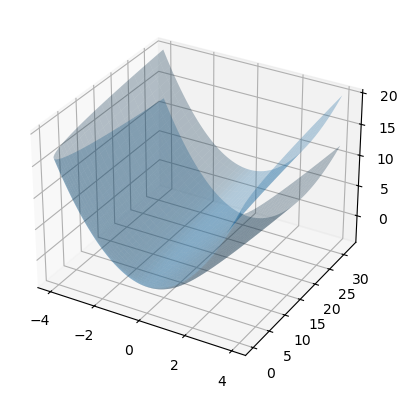

In [114]:
u = np.linspace(-4, 4, 200)
v = np.linspace(-4, 4, 200)
U, V = np.meshgrid(u, v)
X = U
Y = 2*V**2
Z = U**2 + V

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
plt.show()

Oppervlakken en hun parametrisaties zullen nog in meer detail aan bod komen in de cursus Calculus II.

Met Matplotlib is nog veel meer mogelijk dan we in deze inleiding behandeld hebben. Een uitstekende referentie om meer bij te leren is <a href="http://matplotlib.org/gallery.html">deze pagina</a> waar verschillende voorbeelden staan uitgewerkt met code bij. Dit notebook vormt slechts een inleiding in het gebruik van MatplotLib en de documentatie/gallerij is zeker een goede plaats om meer te leren over hoe je bepaalde elementen van je grafieken kan veranderen.

## De interactie tussen Sympy en Numpy

Je hebt hier nu gezien hoe je op een lijst punten een Numpy-functie kan toepassen en deze functie kan plotten. Hoewel er [erg veel](http://docs.scipy.org/doc/numpy/reference/routines.math.html) functies standaard zitten ingebouwd in Numpy (en er nog een hele schatkamer te vinden is in het pakket Scipy), kan het toch al eens voorvallen dat je iets wilt plotten dat niet in het standaardpakket zit. Ook als je eerst veel symbolische berekeningen in Sympy doet en uiteindelijk het resultaat wilt tekenen met de volle kracht van MatplotLib, is het niet altijd evident om met de hand deze Sympy-uitdrukkingen om te zetten in Numpy-functies. Hiervoor heeft Sympy een ingebouwde functie `lambdify`, die automatisch een Sympy-uitdrukking omzet in een Numpy-functie. We zullen dit illustreren met een voorbeeld. Eerst importeren we Sympy

In [115]:
import sympy as sp

Vervolgens maken we enkele symbolische bewerkingen met Sympy. Stel dat we interessante eigenschappen van de Gaussische functie
$$f(x) = e^{-x^2}$$
aan het ontdekken zijn.

In [116]:
x, t = sp.symbols('x t')
f = sp.exp(-x**2)

In [117]:
sp.integrate(f, (x, -sp.oo, sp.oo))

sqrt(pi)

Indien we later toch met de mogelijkheden van MatplotLib de functie $f$ willen plotten, kunnen we `lambdify` gebruiken om deze functie om te zetten naar een lijst met functiewaarden.

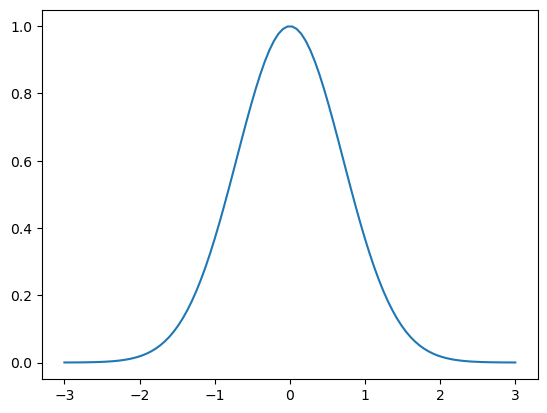

In [118]:
X = np.linspace(-3, 3, 100)
Y = sp.lambdify(x, f, "numpy")(X)

fig, ax = plt.subplots(1,1)
ax.plot(X, Y)
plt.show()

De functie `lambdify` neemt drie argumenten aan. Het eerste is het Sympy-symbool dat in de uitdrukking voorkomt. Het tweede argument is de uitdrukking zelf en het derde argument zegt dat we van de uitdrukking een Numpy-functie willen maken.

Stel dat we het verloop van $f'(x)$ willen plotten via MatplotLib. We kunnen dan eerst de functie definiëren die $x$ afstuurt op $f'(x)$ zoals we eerder gedaan hebben, maar onderstaande shortcut werkt ook.

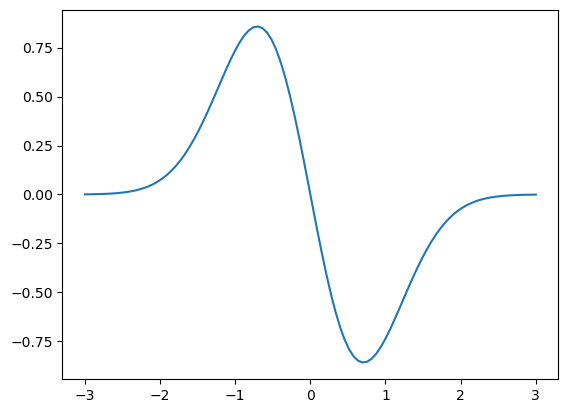

In [119]:
X = np.linspace(-3, 3, 100)
Y = sp.lambdify(x, sp.diff(f, x), "numpy")(X)

fig, ax = plt.subplots(1,1)
ax.plot(X, Y)
plt.show()

**Opdracht 7:** Met `lambdify` kun je ook parameterkrommen laten plotten die je eerst in Sympy hebt gedefinieerd en bestudeerd. Kijk eerst terug in dit werkblad hoe je een parameterkromme met Matplotlib tekent. Gebruik vervolgens `lambdify` om de kromme $x = f_1(t), y = g_1(t)$ via Matplotlib te laten tekenen, waarbij $f_1 = 2\cos(t)$ en $g_1 = 3\sin(t)$.

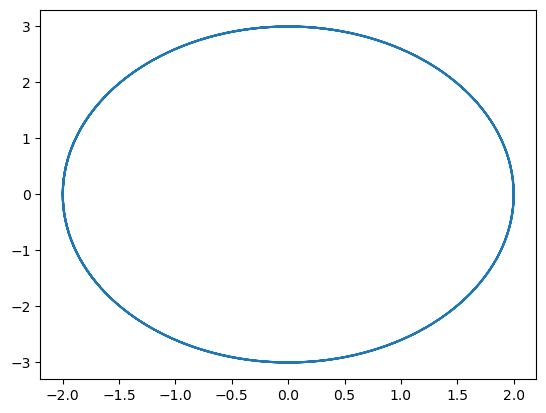

In [123]:
t = sp.symbols('t')
f1 = sp.Function('f1')
f1 = 2*sp.cos(t)
g1 = sp.Function('g1')
g1 = 3*sp.sin(t)

T = np.linspace(-10, 10, 1000)
X = sp.lambdify(t, f1, 'numpy')(T)
Y = sp.lambdify(t, g1, 'numpy')(T)

plt.plot(, Y)


Deze methode werkt snel en efficiënt als de Sympy-uitdrukking niet al te ingewikkeld is. Laten we een laatste voorbeeld bekijken. De errorfunctie is gedefinieerd als
$$\text{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}\,dt.$$
In Sympy wordt dit

In [124]:
e = (2/sp.sqrt(sp.pi))*sp.Integral(sp.exp(-t**2), (t, 0, x))
e

2*Integral(exp(-t**2), (t, 0, x))/sqrt(pi)

Willen we nu verdergaan zoals hierboven, dan voeren we volgende code uit

In [125]:
X = np.linspace(-3, 3, 100)
Y = sp.lambdify(x, e, "numpy")(X)

PrintMethodNotImplementedError: Unsupported by <class 'sympy.printing.numpy.NumPyPrinter'>: <class 'sympy.integrals.integrals.Integral'>
Set the printer option 'strict' to False in order to generate partially printed code.

Je krijgt hier een fout te zien die zegt dat de naam 'Integral' niet gedefinieerd is. Dit gebeurt omdat Numpy geen methoden heeft om integralen numeriek te berekenen. We zullen hier dus een mouw aan moeten passen. Laten we eerst het lambdify-commando subtiel veranderen.

In [126]:
e_functie = sp.lambdify(x, e, "sympy")

We hebben van de uitdrukking `e` nu een Sympy-functie gemaakt. Dit kan ons verderhelpen omdat we nu deze functie kunnen aanroepen op alle punten in de lijst `X`. We gebruiken nog eens de functie `N` uit Sympy omdat we numerieke waarden willen.

In [127]:
Y = [sp.N(e_functie(waarde)) for waarde in X] # Bereken de numerieke functiewaarden

Je merkte waarschijnlijk op dat deze operatie redelijk lang duurde. Deze methode is dan ook enkel aan te raden als laatste hulpmiddel. Nu we numerieke functiewaarden hebben, is het tekenen van de grafiek routine.

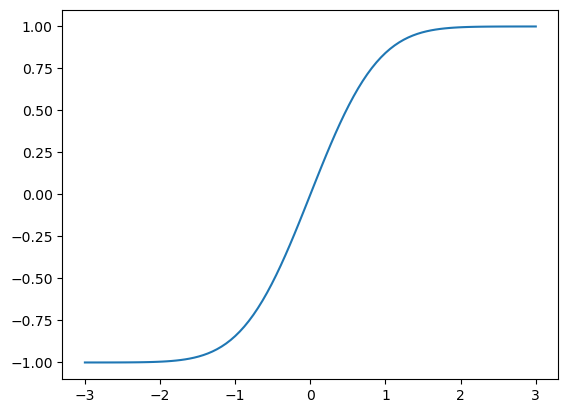

In [130]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, Y)

In de praktijk zal je `lambdify` enkel gebruiken als je symbolische berekeningen en numerieke berekeningen achter elkaar in hetzelfde script gebruikt. Als je op voorhand al weet welke functies je precies nodig hebt, zijn er grote bibliotheken van speciale functies (zoals bijvoorbeeld die van [Scipy](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special)) die zeer efficiënt met Numpy kunnen samenwerken. In de vakken Calculus 1 en 2 zullen we niet met Scipy werken maar nu weet je wel af van het bestaan hiervan.